# Bell inequalities in real space for the Minkowski vacuum
This notebook produces the plots of arXiv:2203.03505 related to Minkowski spacetime, in particular figs. 2 and 6.

As reminder, arXiv:2203.03505 is a study of Bell inequalities in real space for both Minkowski and de Sitter space-times. In a nutshell, the goals of the paper are:

i) Study whether quantum fields in Gaussian states tend to violate Bell inequalities in real space.

ii) Apply this to cosmological perturbations, which have a quantum origin in the inflationary paradigm.

iii) Compare results with that of quantum discord, which is known to be non-vanishing in this same set-up.

Some of its conclusions are:

i) Due to "effective decoherence", quantum fields tend not to violate Bell inequalities in real space.

ii) Therefore, this tool as it is is not helpful to probe the quantum origin of primordial perturbations.

iii) There seems to be a contradiction with quantum discord, casting doubt on its valitidy for highly mixed states.

This notebook deals with the results in Minkowski spacetime

In [1]:
# Import all the needed packages

import numpy as np
from scipy import special
from scipy import integrate
import sympy
import math
import cmath
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text',usetex=True)

In [2]:
# Import auxiliary files

from minkowski_aux import * # Characterization of the Minkowski vacuum
from bell_aux import * # Expected values of the Bell operators (GKMR and Larsson)

We show the plots of the Bell operator built from GKMR pseudo-spin operators. We allow separately for a variation of alpha, which is related to the distance, and delta, which is related to the coarse-graining scale

In [3]:
# Compute the GKMR Bell operator as a function of alpha

deltafix = 0.01 # fix delta
alphas = np.linspace(2*(1+deltafix)+deltafix/10,10,100) # array of alphas

bell_alpha = np.array([]) # instantiate array

# loop over the range of alphas
for alpha in alphas:
    cov = compute_gammas_exact(alpha,deltafix) # compute covariance matrix
    sxx = Sxx_GKMR(cov) # compute <SxSx>
    szz = Szz_GKMR(cov) # compute <SzSz>
    bell_alpha = np.append(bell_alpha, 2*np.sqrt(sxx**2+szz**2)) # append Bell array

In [4]:
# Compute the GKMR Bell operator as a function of delta
# Note that the approximated expression admits small delta only
# Alpha is fixed to the small allowed by each delta

logdeltas_exact = np.linspace(-6,3,100) # range of delta for the exact expression
logdeltas_app = np.linspace(-6,-1.5,100) # range of delta for the approximated expression
alphasmin = 2*(1+np.exp(logdeltas_exact))+np.exp(logdeltas_exact)/100 # range of alpha for the exact expression
alphasminmany = 2*(1+np.exp(logdeltas_app))+np.exp(logdeltas_app)/100 # range of alpha for the app expression

bell_delta = np.array([]) # instantiate array

# iterate over the range of deltas (exact)

for logdelta in logdeltas_exact:
    
    delta = np.exp(logdelta)
    alphamin = 2*(1+delta)+delta/100 # compute alpha
    cov = compute_gammas_exact(alphamin,delta)
    sxx=Sxx_GKMR(cov) # compute <SxSx>
    szz=Szz_GKMR(cov) # compute <SzSz>
    bell_delta = np.append(bell_delta, 2*np.sqrt(sxx**2+szz**2)) # append Bell array

/Users/llorencespinosaportales/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


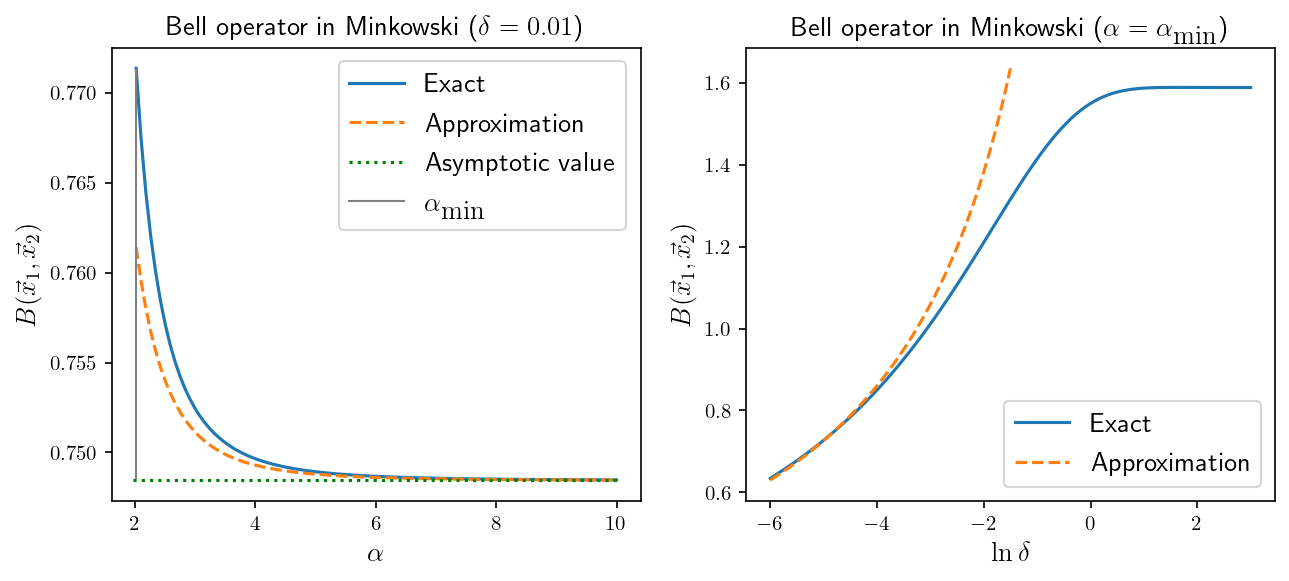

In [5]:
# Plot GKMR Bell as a function of alpha and delta

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False,figsize = (10,4),dpi=150)

# Subplot as a function of alpha
asym = asymptote(deltafix)
ax0.plot(alphas,bell_alpha,label="Exact")
ax0.plot(alphas,Bell_GKMR_largealpha(alphas,deltafix),label="Approximation",linestyle='dashed')
ax0.axhline(y=asym,xmin=0.04,xmax=0.96,color='green',linestyle='dotted',label="Asymptotic value")
ax0.axvline(x=2*(1+deltafix),color="gray",linewidth=1,ymin=0.05,ymax=0.95,label=r"$\alpha_\textrm{min}$")
ax0.set_title(r"Bell operator in Minkowski ($\delta = 0.01$)",fontsize=13)
ax0.set_xlabel(r'$\alpha$',fontsize=13)
ax0.set_ylabel(r'$B(\vec{x}_1,\vec{x}_2)$',fontsize=13)
ax0.legend(bbox_to_anchor = (0.7, 1), loc = 'upper center',fontsize=13)

# Subplot as a function of delta
ax1.plot(logdeltas_exact,bell_delta,label="Exact")
ax1.plot(logdeltas_app,Bell_GKMR_smalldelta(alphasminmany,logdeltas_app),label="Approximation",linestyle="dashed")
ax1.set_xlabel(r'$\ln \delta $',size=13)
ax1.set_ylabel(r'$B(\vec{x}_1,\vec{x}_2)$',size=13)
ax1.set_title(r"Bell operator in Minkowski ($\alpha = \alpha_\textrm{min}$)",size=13)
ax1.legend(fontsize=13)

fig.show()

As it can be seen, there is no Bell inequality violation, for B < 2.

We show the plots of the Bell operator built from Larsson pseudo-spin operators. These are actually a one-parameter family of operators, labelled by l, which makes its study computationally more expensive. Approximations in the small- and large-l regimes are also provided.

In [9]:
# Compute the Larsson Bell operator as a function of l
# alpha and delta are fixed
# Note that for l<1 computing times increase fast, as l**(-2)
# In practice, l < 0.3 is discouraged

alpha = 3 # An array of alphas is allowed if necessary
ells = np.linspace(0.3,2,180) # Array of l
delta = 0.1 # Fixed value of delta

cov = compute_gammas_exact(alpha,delta) # build the covariance matrix

bell_L = np.array([])

# Iterate over the parameter l
for ell in ells:
    
    # compute correlation functions with l-dependent cut-off
    sxx = Sxx_L(ell,int(max(round(10/ell**2),10)),cov) 
    szz = Szz_L(ell,int(max(round(10/ell**2),10)),cov)
    
    # build Bell
    bell_L = np.append(bell_L, 2*np.sqrt(sxx**2 + szz**2))

In [10]:
# Compute small-l approximation for Larsson Bell
# alpha and delta are fixed
# This allows to go below l = 0.3

bell_L_app = np.array([])
    
# Iterate over the parameter l
for ell in ells:
    
    # compute approximated correlation functions
    sxx = Sxx_L_app(ell,cov)
    szz = Szz_L_app(ell,cov)
    
     # build Bell
    bell_L_app = np.append(bell_L_app, 2*np.sqrt(sxx**2 + szz**2))

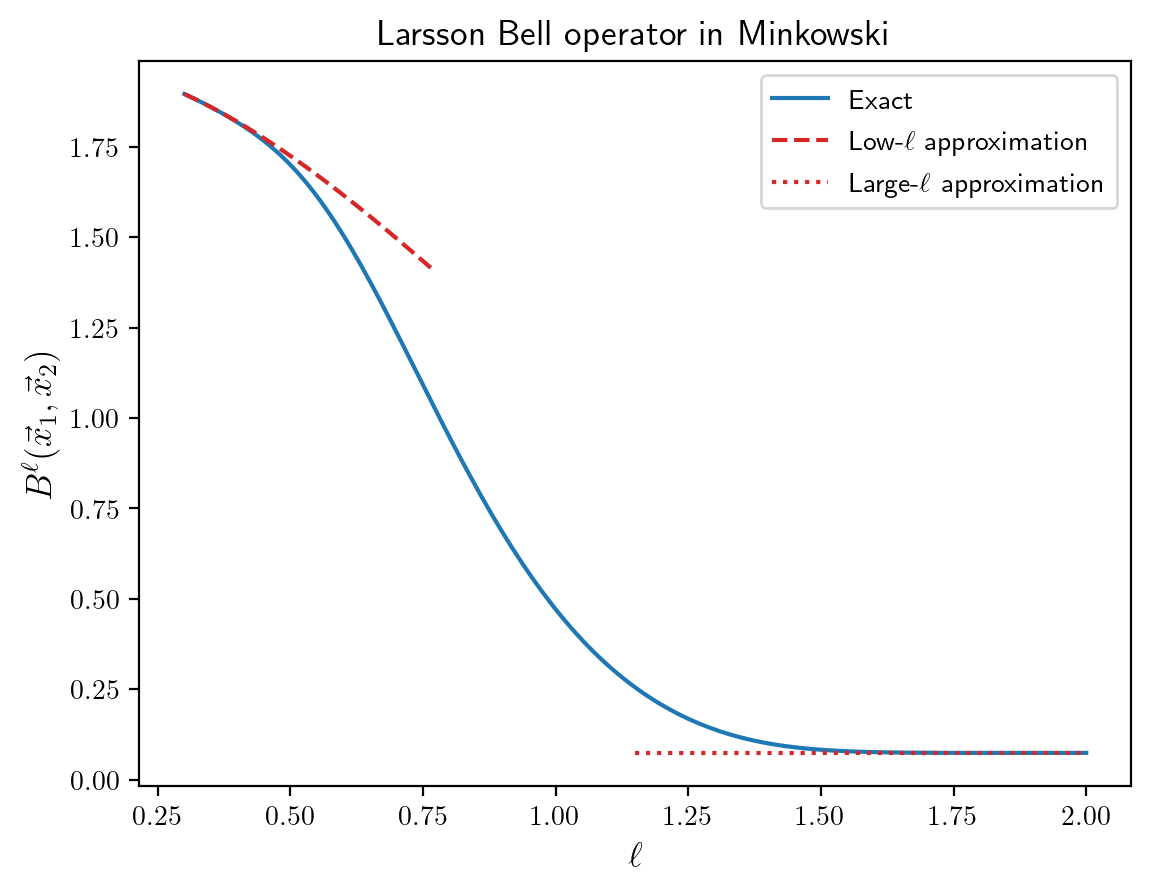

In [11]:
# Plot Larsson Bell

plt.figure(figsize = (6.4,4.8),dpi=200)
plt.plot(ells,bell_L,label="Exact")
plt.plot(ells[:50],bell_L_app[:50],label=r"Low-$\ell$ approximation",color="tab:red",linestyle="dashed")
#plt.yscale('log')
plt.xlabel(r'$\ell$',fontsize=13)
plt.ylabel(r'$B^\ell(\vec{x}_1,\vec{x}_2)$',fontsize=13)
plt.title(r'Larsson Bell operator in Minkowski',fontsize=13)
plt.axhline(y=2*Sxx_GKMR(cov),color="tab:red",linestyle="dotted",xmin=0.5,xmax=0.95,label=r"Large-$\ell$ approximation")
plt.legend()
plt.show()

As it can be seen, there is no Bell inequality violation, for B < 2.